In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

In [ ]:
#Load Data
data = pd.read_csv("1000_Companies.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
data.shape

(1000, 5)

In [ ]:
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


Data is clean!

In [ ]:
# Data Transformation
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['State'] = encoder.fit_transform(data['State'])

data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


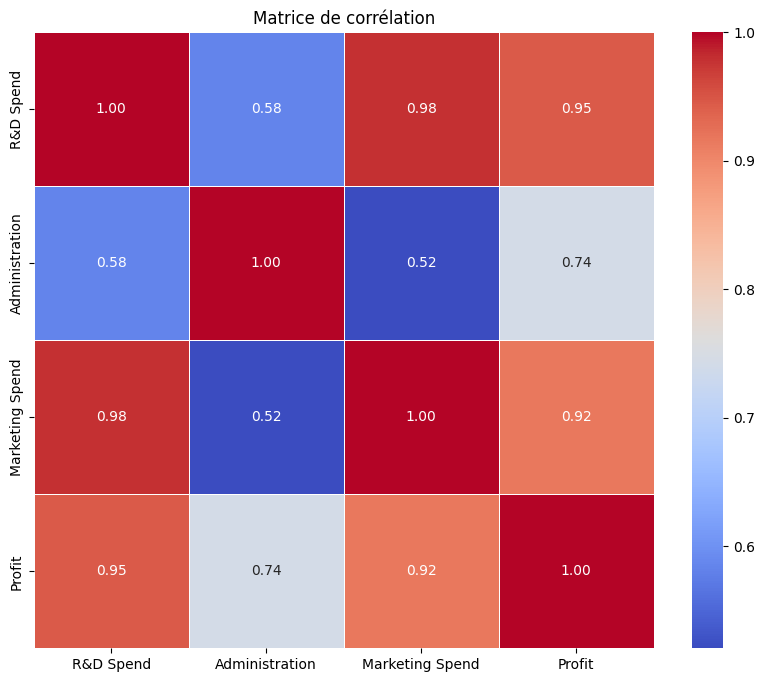

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap de la matrice de corrélation
correlation_matrix = data.iloc[: , [0,1,2,4]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# Feature selection
x = data.drop("Profit" , axis = 1 , inplace= False)
y = data.iloc[ : , 4]

print(x)
print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

     R&D Spend  Administration  Marketing Spend  State
0    165349.20      136897.800      471784.1000      2
1    162597.70      151377.590      443898.5300      0
2    153441.51      101145.550      407934.5400      1
3    144372.41      118671.850      383199.6200      2
4    142107.34       91391.770      366168.4200      1
..         ...             ...              ...    ...
995   54135.00      118451.999      173232.6695      0
996  134970.00      130390.080      329204.0228      0
997  100275.47      241926.310      227142.8200      0
998  128456.23      321652.140      281692.3200      0
999  161181.72      270939.860      295442.1700      2

[1000 rows x 4 columns]
0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64


In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

-51144.72642572201


In [ ]:
#model evaluation
from sklearn.metrics import r2_score,mean_squared_error

#MSE
MSE = mean_squared_error(y_test,y_pred)
#R_squared
r2 = r2_score(y_test,y_pred)

print("MSE :{:.4f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MSE :192169702.4952
R2_score :0.91


In [ ]:
# Evaluation


new_data = {

    'R&D Spend': [100000.0, 150000.0, 120000.0],
    'Administration': [100000.0, 110000.0, 130000.0],
    'Marketing Spend': [100000.0, 120000.0, 140000.0],
    'State': ['California', 'Florida', 'New York']
}

# Création du DataFrame
df = pd.DataFrame(new_data)

label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

print(new_data)


# Exemple d'utilisation du modèle
predictions = regressor.predict(df)

# Résultats des prédictions
print(predictions)


{'R&D Spend': [100000.0, 150000.0, 120000.0], 'Administration': [100000.0, 110000.0, 130000.0], 'Marketing Spend': [100000.0, 120000.0, 140000.0], 'State': ['California', 'Florida', 'New York']}
[ 96725.53349319 133327.00021795 136167.53443626]
